In [3]:
##importing library
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DATA PREPROCESSING




Training data preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation image preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


Building model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model= Sequential()

Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same',activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=512, kernel_size=3, padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [13]:
model.add(Dropout(0.25)) #to avoid overfitting

add to neural network

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units =1500,activation= 'relu'))

In [16]:
model.add(Dropout(0.4))

Output layer

In [17]:
model.add(Dense(units=38, activation='softmax'))

Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

Model Training

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 274s 124ms/step - loss: 0.0787 - accuracy: 0.9739 - val_loss: 0.1713 - val_accuracy: 0.9496
Epoch 2/10
2197/2197 [==============================] - 226s 103ms/step - loss: 0.0653 - accuracy: 0.9791 - val_loss: 0.1192 - val_accuracy: 0.9628
Epoch 3/10
2197/2197 [==============================] - 242s 110ms/step - loss: 0.0604 - accuracy: 0.9807 - val_loss: 0.1154 - val_accuracy: 0.9681
Epoch 4/10
2197/2197 [==============================] - 239s 108ms/step - loss: 0.0512 - accuracy: 0.9827 - val_loss: 0.1296 - val_accuracy: 0.9597
Epoch 5/10
2197/2197 [==============================] - 225s 102ms/step - loss: 0.0458 - accuracy: 0.9849 - val_loss: 0.1440 - val_accuracy: 0.9582
Epoch 6/10
2197/2197 [==============================] - 223s 101ms/step - loss: 0.0427 - accuracy: 0.9865 - val_loss: 0.1666 - val_accuracy: 0.9542
Epoch 7/10
2197/2197 [==============================] - 230s 105ms/step - loss: 0.0392 - accuracy: 0.9876 - val_

Model Evaluation

In [21]:
train_loss, train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 98s 44ms/step - loss: 0.0078 - accuracy: 0.9975


In [22]:
print(train_loss, train_acc)

0.007845152169466019 0.9975104928016663


In [23]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 25s 45ms/step - loss: 0.0966 - accuracy: 0.9750


In [24]:
print(val_loss, val_acc)

0.09659840166568756 0.9750170707702637


Saving Model

In [25]:
model.save("trained_model.keras")

In [26]:
print(training_history.history)

{'loss': [0.07866470515727997, 0.0652727410197258, 0.0604369230568409, 0.051240820437669754, 0.04580505192279816, 0.04269740357995033, 0.03921087831258774, 0.03829944133758545, 0.03339620679616928, 0.03227474167943001], 'accuracy': [0.9738957285881042, 0.9790738821029663, 0.9806529879570007, 0.9827014803886414, 0.9849064946174622, 0.9864997267723083, 0.9875808954238892, 0.9879365563392639, 0.9889465570449829, 0.9896721243858337], 'val_loss': [0.17125380039215088, 0.11923176795244217, 0.1153976321220398, 0.12958940863609314, 0.1440424919128418, 0.1665952056646347, 0.0981045514345169, 0.09515050798654556, 0.1250903159379959, 0.09659837931394577], 'val_accuracy': [0.9496358036994934, 0.9628385901451111, 0.9681311249732971, 0.9597086310386658, 0.958172082901001, 0.9541884660720825, 0.9715456366539001, 0.9729114770889282, 0.9657978415489197, 0.9750170707702637]}


Recording History in json

In [27]:
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [28]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Accuracy Visualization

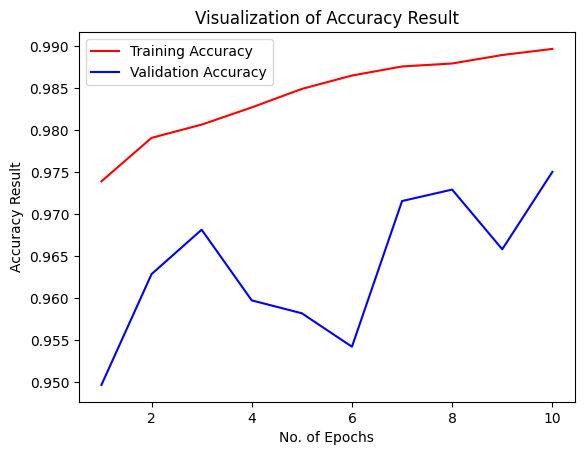

In [29]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

some other matrics for model evaluation

In [30]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [31]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [32]:
y_pred = model.predict(test_set)
y_pred.size

17572/17572 [==============================] - 103s 6ms/step


667736

In [33]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [35]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_true,predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.98      0.97       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.97      0.98      0.98       502
                               Blueberry___healthy       0.97      1.00      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.89      0.92       410
                       Corn_(maize)___Common_rust_       0.95      1.00      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.

Confusion Matrix

In [37]:
cm =confusion_matrix(Y_true, predicted_categories)

Confusion Matrix Visualilzation

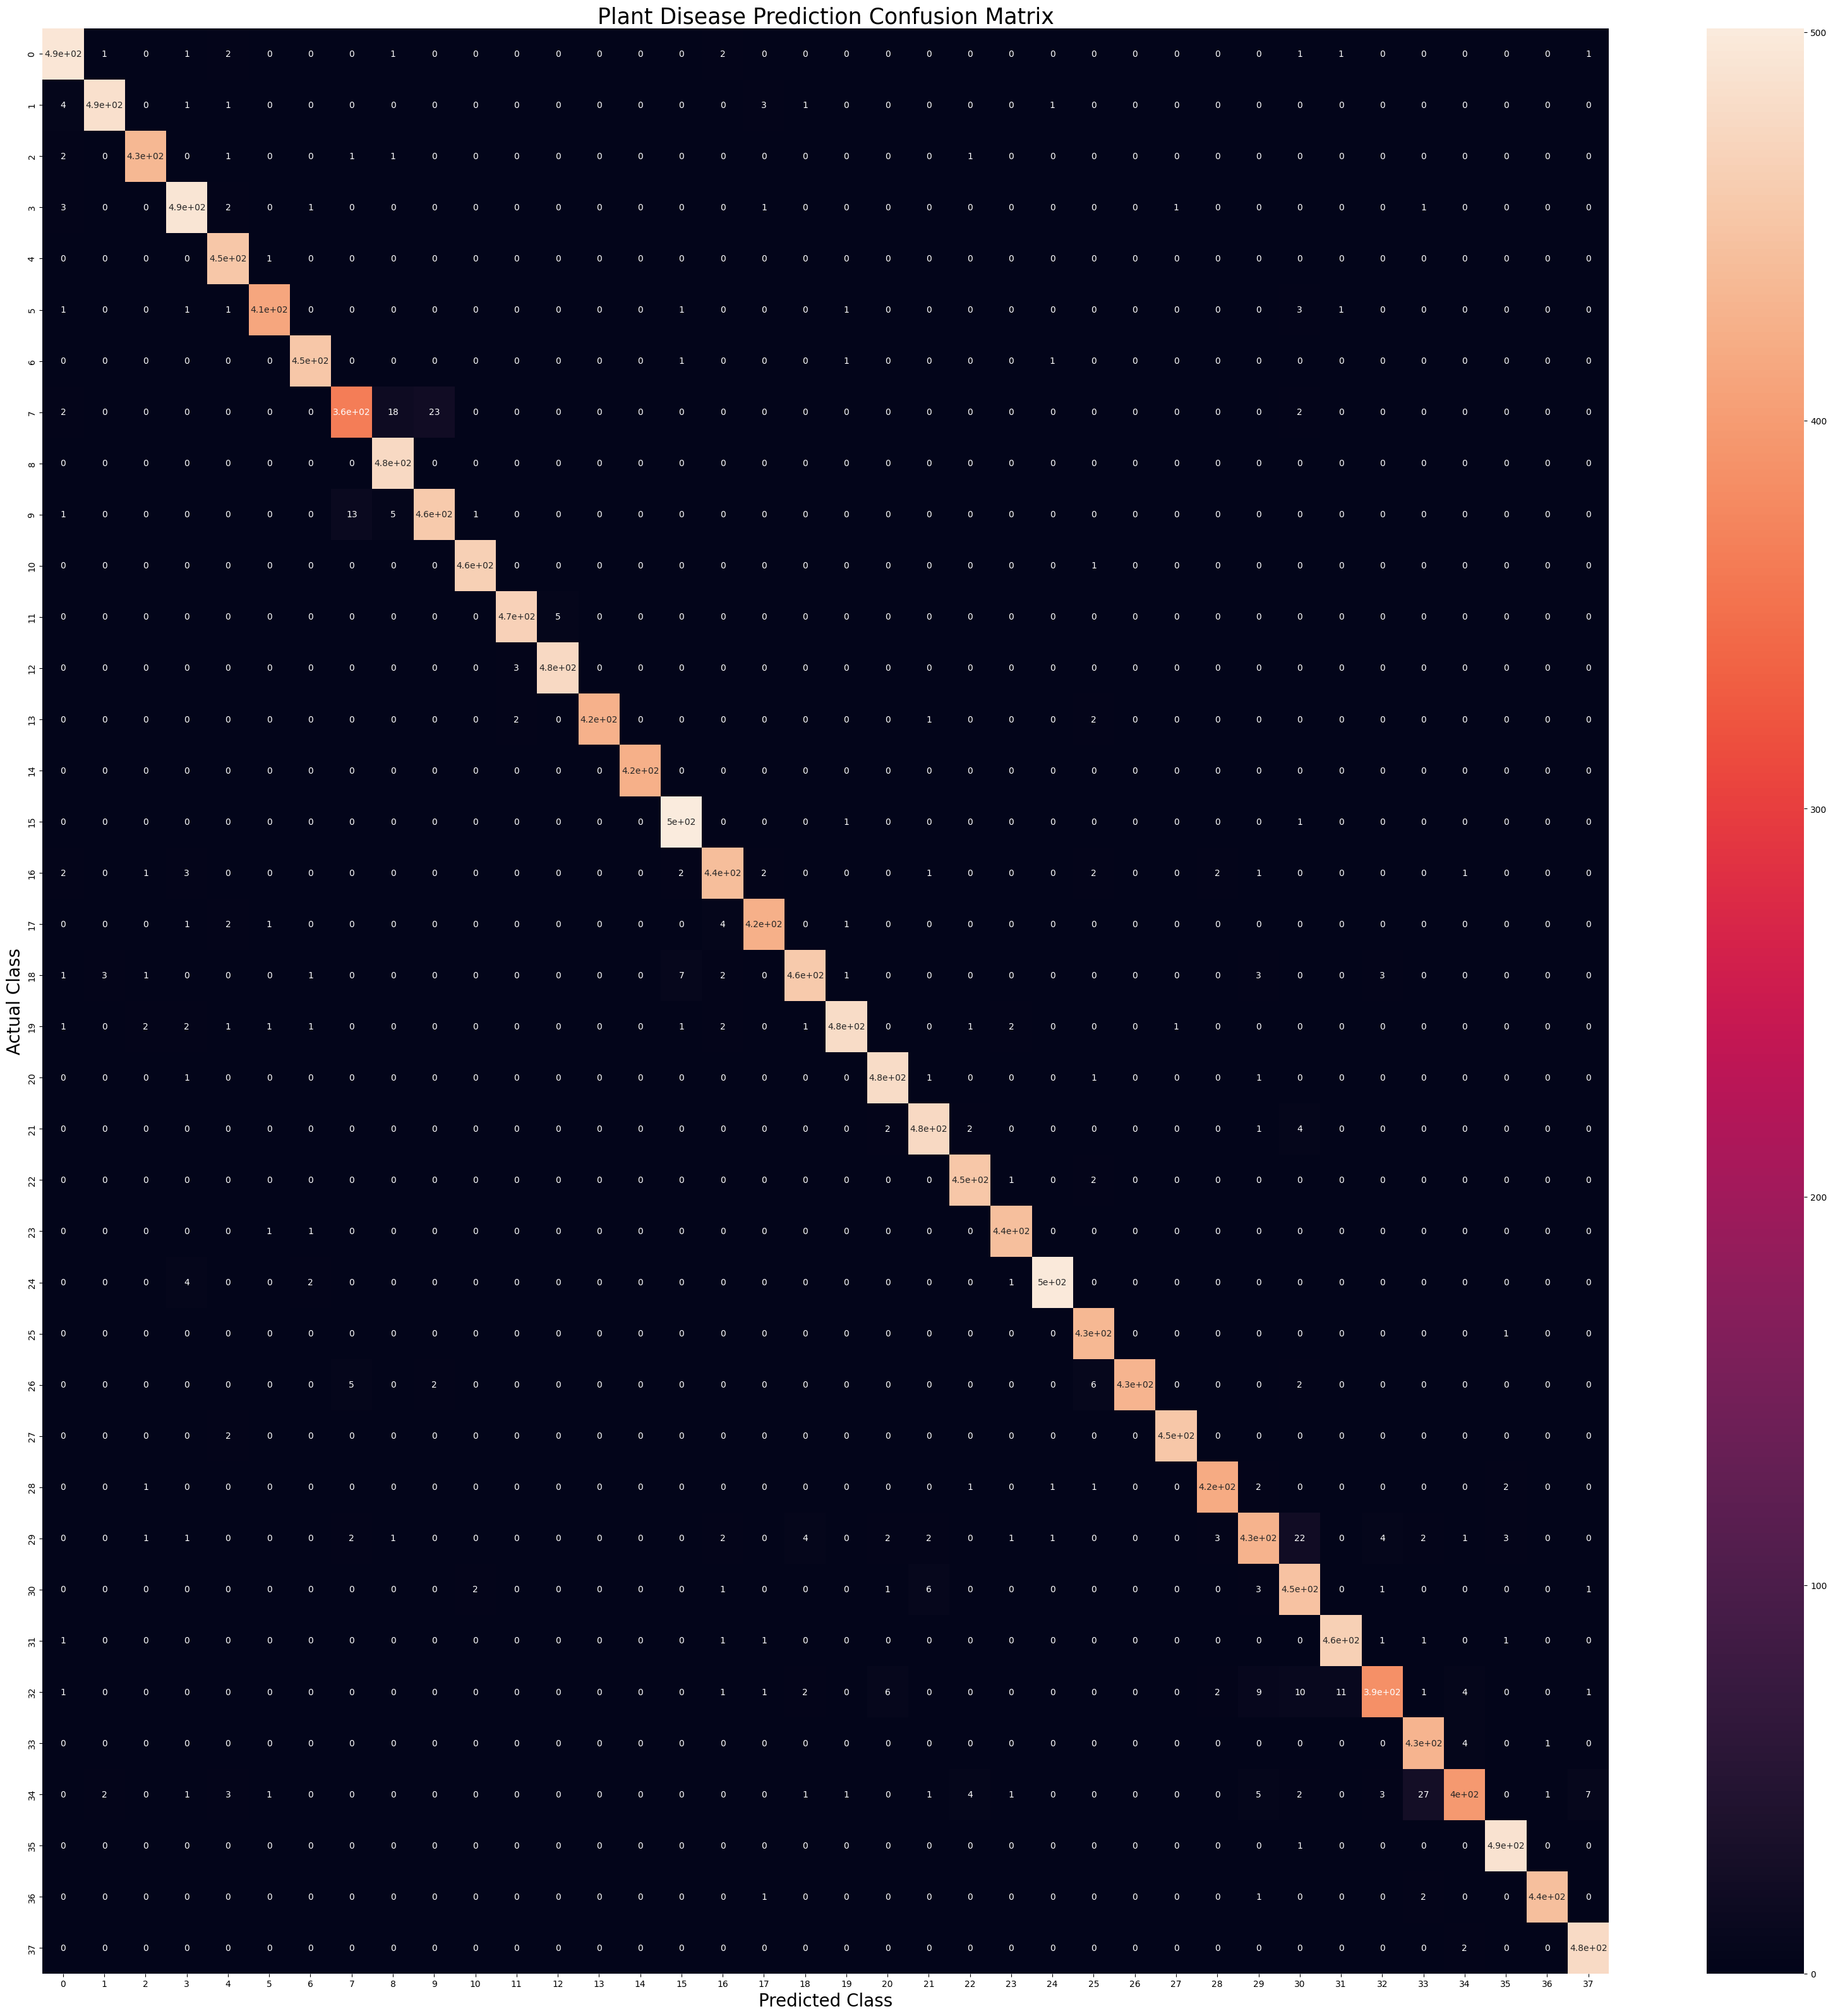

In [38]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [39]:
model.save("trained_model.h5")


In [40]:
# Convert the model to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save it to a .tflite file
with open('trained_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\tanis\AppData\Local\Temp\tmp5b_q874x\assets


INFO:tensorflow:Assets written to: C:\Users\tanis\AppData\Local\Temp\tmp5b_q874x\assets
